In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import random
import matplotlib.pyplot as plt
import os
import dlib

In [2]:
train_data= "/kaggle/input/autism-image-data/AutismDataset/train"
test_data= "/kaggle/input/autism-image-data/AutismDataset/test"
validation_autistic= "/kaggle/input/autism-image-data/AutismDataset/valid/Autistic"
validation_nonautistic= "/kaggle/input/autism-image-data/AutismDataset/valid/Non_Autistic"


In [3]:
train_img = ["../input/autism-image-data/AutismDataset/train/{}".format(i) for i in os.listdir(train_data)]
test_img = ["../input/autism-image-data/AutismDataset/test/{}".format(i) for i in os.listdir(test_data)]
valid_autistic_img = ["/kaggle/input/autism-image-data/AutismDataset/valid/Autistic/{}".format(i) for i in os.listdir(validation_autistic)]
valid_nonautistic_img = ["/kaggle/input/autism-image-data/AutismDataset/valid/Non_Autistic/{}".format(i) for i in os.listdir(validation_nonautistic)]        


#valids_img = valid_autistic_img + valid_nonautistic_img
#random.shuffle(train_img)
#random.shuffle(valids_img)


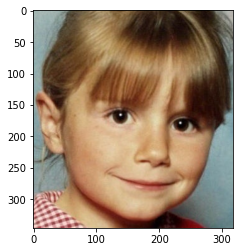

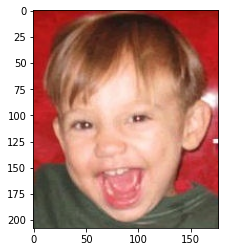

In [4]:
sample2=[]
def sampledata():
    for i in train_img[0:2]:
        img=cv2.imread(i)
        sample=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imgplot = plt.imshow(sample)
        plt.show()
        sample2.append(sample)
    return sample2
sample_data=sampledata()


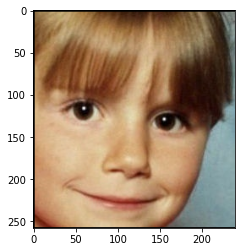

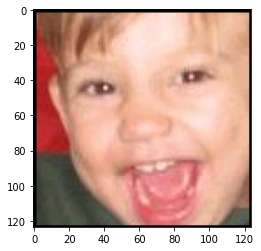

In [5]:
detectedimages=[]
def cropping_based_face_detection(samdata): 
    detector = dlib.get_frontal_face_detector()
    greyimg=cv2.cvtColor(samdata, cv2.COLOR_BGR2GRAY)
    detectedimg = detector(greyimg)
    #print("found {} face(s)".format(len(detectedimg)))
    for face in detectedimg:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()
        img=cv2.rectangle(samdata, (x1, y1), (x2, y2), (0, 0, 0), 2)
        #imgplot = plt.imshow(img)
        #plt.show()
        cropped=img[face.top():face.bottom(),face.left():face.right()]
        imgplot = plt.imshow(cropped)
        plt.show()
    detectedimages.append(cropped)
    return detectedimages

for i in sample_data:
    det_img=cropping_based_face_detection(i)

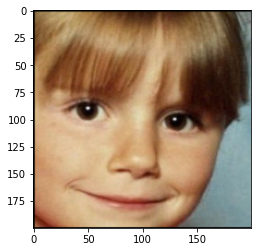

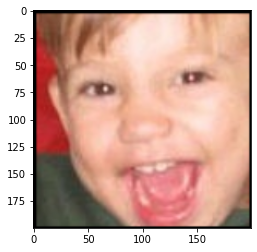

In [6]:
resizedimg=[]
def ReSize(detimg):
    img=cv2.resize(detimg,(200,200))
    imgplot = plt.imshow(img)
    plt.show()
    resizedimg.append(img)
    return resizedimg

for i in det_img:
    res_img=ReSize(i)
    

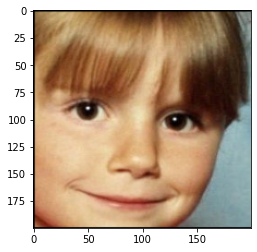

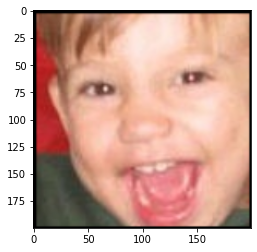

In [7]:
norm=[]
def normalize(resimg):
    img=cv2.cvtColor(resimg,cv2.COLOR_BGR2RGB)
    img_normalized = cv2.normalize(img, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    #print(img_normalized)
    img1=cv2.cvtColor(img_normalized,cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(img1)
    plt.show()
    norm.append(img1)
    return norm

for i in res_img:
    norm_img=normalize(i)    

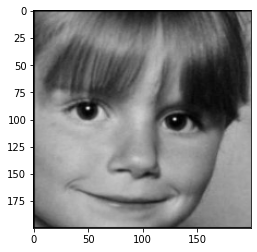

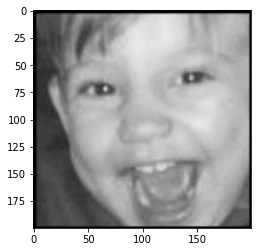

In [8]:
grey=[]
def gray(resimg):
    img=cv2.cvtColor(resimg, cv2.COLOR_BGR2GRAY)
    I=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(I)
    plt.show()
    grey.append(I)
    return grey

for i in res_img:
    grey_img=gray(i)   
    

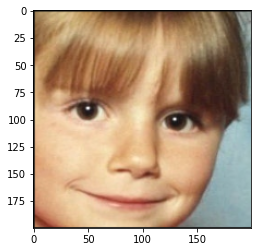

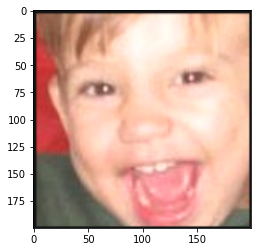

In [9]:
bc=[]
def Brightnessandcontrast(resimg):
    Bright = 20
    Contrast = 1
    img=cv2.cvtColor(resimg,cv2.COLOR_BGR2RGB)
    adjusted = cv2.convertScaleAbs(img, alpha=Contrast, beta=Bright)
    rgbadjusted=cv2.cvtColor(adjusted,cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(rgbadjusted)
    plt.show()
    bc.append(rgbadjusted)
    return bc

for i in res_img:
    b_c=Brightnessandcontrast(i)

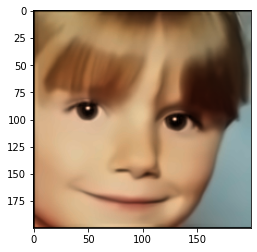

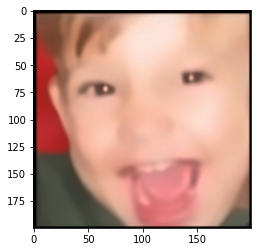

In [10]:
blurred=[]
def mean_noise_reduction(resimg):
    img=cv2.cvtColor(resimg,cv2.COLOR_BGR2RGB)
    filteredimg = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    rgbfilteredimg=cv2.cvtColor(filteredimg,cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(rgbfilteredimg)
    plt.show()
    blurred.append(rgbfilteredimg)
    return blurred

for i in res_img:
    blur_img=mean_noise_reduction(i)
    
    

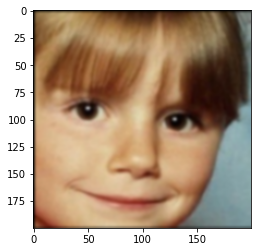

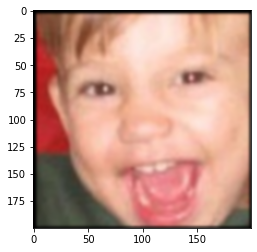

In [11]:
blur=[]
def three_noise_reduction(resimg):
    img=cv2.cvtColor(resimg,cv2.COLOR_BGR2RGB)
    filteredimg =cv2.GaussianBlur(img,(5,5),0)
    #filteredimg=cv2.blur(img,(5,5))
    #filteredimg=cv2.medianBlur(img,5)
    rgbfilteredimg=cv2.cvtColor(filteredimg,cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(rgbfilteredimg)
    plt.show()
    blur.append(rgbfilteredimg)
    return blur

for i in res_img:
    blur_img=three_noise_reduction(i)